## [미니프로젝트] 악성사이트 탐지 머신러닝 모델 개발

## <b>[2단계] 데이터 분석 및 전처리

## ▣ 데이터 소개
* 학습 데이터셋 : train_dataset.csv
<br>

## ▣ 학습 데이터셋의 변수 소개

* url_len : URL 길이
* url_num_hypens_dom : URL내 '-'(하이픈) 개수
* url_path_len : URL의 경로 길이
* url_domain_len : URL의 도메인 길이
* url_host_name : URL의 hostname 길이
* url_num_dots : URL내 '.'(닷) 개수
* url_num_underscores : URL내 '_'(언더바) 개수
* url_query_len : URL쿼리 길이
* url_num_query_para : URL쿼리의 파라미터 개수
* url_ip_present : URL내 IP표시 여부
* url_entropy : URL 복잡도
* url_chinese_present : URL내 중국어 표기 여부
* url_port : URL내 포트 표기 여부
* html_num_tags('iframe') : HTML내 'iframe' 태그 개수
* html_num_tags('script') : HTML내 'script' 태그 개수
* html_num_tags('embed') : HTML내 'embed' 태그 개수
* html_num_tags('object') : HTML내 'object' 태그 개수
* html_num_tags('div') : HTML내 'div' 태그 개수
* html_num_tags('head') : HTML내 'head' 태그 개수
* html_num_tags('body') : HTML내 'body' 태그 개수
* html_num_tags('form') : HTML내 'form' 태그 개수
* html_num_tags('a') : HTML내 'a' 태그 개수
* html_num_tags('applet') : HTML내 'applet' 태그 개수
* Result_v1 : 악성사이트 여부 컬럼 ( 'malicious'는 악성사이트, 'benign'은 정상사이트 )

<br>

---

### **[프로세스]**
0. 라이브러리 import 및 데이터 불러오기
1. 데이터 분석하기
2. 데이터 전처리하기


---

# <b>Step 0. 라이브러리 import 및 데이터 불러오기
### **가. 라이브러리 import**

In [1]:
# pip install sklearn

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **나.  학습데이터 불러오기**

In [3]:
path = 'train_dataset.csv'
df = pd.read_csv(path, delimiter = ',')
df_col = df.columns
df

,Unnamed: 0,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),Result_v1
0,0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,malicious
1,1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,...,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,0.0,benign
2,2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,...,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,0.0,benign
3,3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,...,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,0.0,benign
4,4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,...,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,0.0,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3659,3659,68.0,3.0,16.0,52.0,52.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,1.0,1.0,0.0,3.0,0.0,malicious
3660,3660,66.0,0.0,48.0,18.0,18.0,2.0,0.0,0.0,0.0,...,14.0,0.0,0.0,212.0,1.0,1.0,3.0,475.0,0.0,benign
3661,3661,90.0,1.0,64.0,26.0,26.0,4.0,0.0,0.0,0.0,...,13.0,0.0,0.0,75.0,1.0,1.0,2.0,103.0,0.0,malicious
3662,3662,46.0,0.0,33.0,13.0,13.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,1.0,1.0,0.0,3.0,0.0,benign


In [4]:
df = df.drop(columns = 'Unnamed: 0', axis = 1)
df

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),Result_v1
0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,malicious
1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,0.0,...,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,0.0,benign
2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,...,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,0.0,benign
3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,0.0,...,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,0.0,benign
4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,0.0,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3659,68.0,3.0,16.0,52.0,52.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,1.0,1.0,0.0,3.0,0.0,malicious
3660,66.0,0.0,48.0,18.0,18.0,2.0,0.0,0.0,0.0,0.0,...,14.0,0.0,0.0,212.0,1.0,1.0,3.0,475.0,0.0,benign
3661,90.0,1.0,64.0,26.0,26.0,4.0,0.0,0.0,0.0,0.0,...,13.0,0.0,0.0,75.0,1.0,1.0,2.0,103.0,0.0,malicious
3662,46.0,0.0,33.0,13.0,13.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,1.0,1.0,0.0,3.0,0.0,benign


In [5]:
df1 =df.copy()
df2 = df.copy()

In [6]:
df1 = df1.iloc[:,1:-1]
df1

,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,url_entropy,...,html_num_tags('iframe'),html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet')
0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,4.260333,...,0.0,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,0.0,4.636107,...,0.0,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,0.0
2,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,3.708966,...,1.0,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,0.0
3,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,0.0,4.025592,...,0.0,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,0.0
4,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,0.0,4.631833,...,0.0,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3659,3.0,16.0,52.0,52.0,2.0,0.0,0.0,0.0,0.0,4.135356,...,0.0,0.0,0.0,0.0,11.0,1.0,1.0,0.0,3.0,0.0
3660,0.0,48.0,18.0,18.0,2.0,0.0,0.0,0.0,0.0,4.362331,...,1.0,14.0,0.0,0.0,212.0,1.0,1.0,3.0,475.0,0.0
3661,1.0,64.0,26.0,26.0,4.0,0.0,0.0,0.0,0.0,4.693343,...,0.0,13.0,0.0,0.0,75.0,1.0,1.0,2.0,103.0,0.0
3662,0.0,33.0,13.0,13.0,3.0,0.0,0.0,0.0,0.0,4.604166,...,0.0,0.0,0.0,0.0,4.0,1.0,1.0,0.0,3.0,0.0


# <b>Step 1. 데이터 분석하기
---

단변량 분석은 데이터분석의 매우 기초적인 분석기법으로, 독립적인 개별 변수가 가지고있는 특성들을 이해하는 과정입니다.

## <b>Q1. 데이터 단변량 분석하기

<span style="color: green"> 개별 변수에 대해 아래 사항들을 분석해보세요. </span>

1. 변수가 내포하고 있는 의미
2. 변수가 수치형인지, 범주형인지
3. 결측치 존재 여부 및 조치 방안
4. 기초 통계량 확인
5. 데이터 분포 확인
6. 위 정보로부터 파악한 내용 정리
7. 추가 분석사항 도출

In [7]:
print(df1.info())
print(df1.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3664 entries, 0 to 3663
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url_num_hyphens_dom      3664 non-null   float64
 1   url_path_len             3663 non-null   float64
 2   url_domain_len           3663 non-null   float64
 3   url_hostname_len         3664 non-null   float64
 4   url_num_dots             3664 non-null   float64
 5   url_num_underscores      3664 non-null   float64
 6   url_query_len            3664 non-null   float64
 7   url_num_query_para       3664 non-null   float64
 8   url_ip_present           3664 non-null   float64
 9   url_entropy              3664 non-null   float64
 10  url_chinese_present      3664 non-null   float64
 11  url_port                 3664 non-null   float64
 12  html_num_tags('iframe')  3664 non-null   float64
 13  html_num_tags('script')  3664 non-null   float64
 14  html_num_tags('embed')  

In [8]:
df1.describe()

,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,url_entropy,...,html_num_tags('iframe'),html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet')
count,3664.000000,3663.000000,3663.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,...,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.0
mean,0.412937,29.365820,20.383292,20.330513,2.516921,0.272653,4.707697,0.104258,0.060862,4.228568,...,0.220797,8.785480,0.018013,0.028930,70.843886,0.998090,1.016648,1.028930,66.182860,0.0
std,0.847058,78.595248,9.597012,9.628093,1.534119,1.124592,25.318285,0.574310,0.239110,0.393055,...,0.898383,12.647356,0.144808,0.237682,365.593304,0.144974,0.225330,1.563903,342.651459,0.0
min,0.000000,0.000000,4.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.737839,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,1.000000,14.000000,14.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.983196,...,0.000000,2.000000,0.000000,0.000000,6.000000,1.000000,1.000000,0.000000,2.000000,0.0
50%,0.000000,13.000000,17.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,4.189561,...,0.000000,4.000000,0.000000,0.000000,33.000000,1.000000,1.000000,1.000000,16.000000,0.0
75%,1.000000,31.000000,24.000000,24.000000,3.000000,0.000000,0.000000,0.000000,0.000000,4.458940,...,0.000000,12.000000,0.000000,0.000000,62.000000,1.000000,1.000000,1.000000,52.000000,0.0
max,14.000000,1816.000000,109.000000,109.000000,32.000000,18.000000,429.000000,9.000000,1.000000,5.821782,...,26.000000,267.000000,3.000000,8.000000,19941.000000,3.000000,3.000000,57.000000,13451.000000,0.0


In [9]:
df1.isnull().sum()  

url_num_hyphens_dom        0
url_path_len               1
url_domain_len             1
url_hostname_len           0
url_num_dots               0
url_num_underscores        0
url_query_len              0
url_num_query_para         0
url_ip_present             0
url_entropy                0
url_chinese_present        0
url_port                   0
html_num_tags('iframe')    0
html_num_tags('script')    0
html_num_tags('embed')     0
html_num_tags('object')    0
html_num_tags('div')       0
html_num_tags('head')      0
html_num_tags('body')      0
html_num_tags('form')      0
html_num_tags('a')         0
html_num_tags('applet')    0
dtype: int64

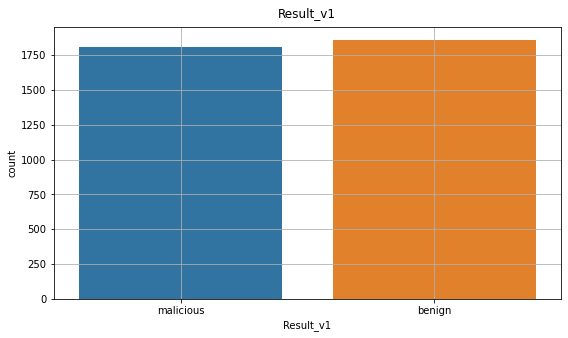

In [10]:
## 먼저 범주형이 데이터 분석
target = 'Result_v1'
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.countplot(x = target , data = df)
plt.grid()
plt.title('Result_v1', pad = 10)
plt.show()

In [11]:
df1.columns

Index(['url_num_hyphens_dom', 'url_path_len', 'url_domain_len',
       'url_hostname_len', 'url_num_dots', 'url_num_underscores',
       'url_query_len', 'url_num_query_para', 'url_ip_present', 'url_entropy',
       'url_chinese_present', 'url_port', 'html_num_tags('iframe')',
       'html_num_tags('script')', 'html_num_tags('embed')',
       'html_num_tags('object')', 'html_num_tags('div')',
       'html_num_tags('head')', 'html_num_tags('body')',
       'html_num_tags('form')', 'html_num_tags('a')',
       'html_num_tags('applet')'],
      dtype='object')

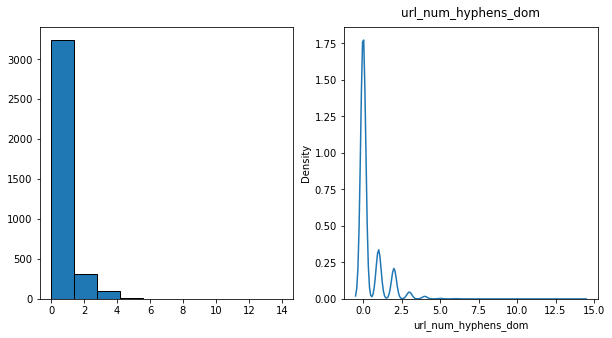

C:\Users\User\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\User\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


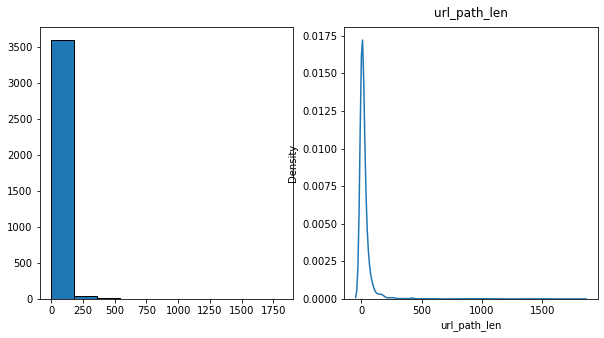

C:\Users\User\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\User\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


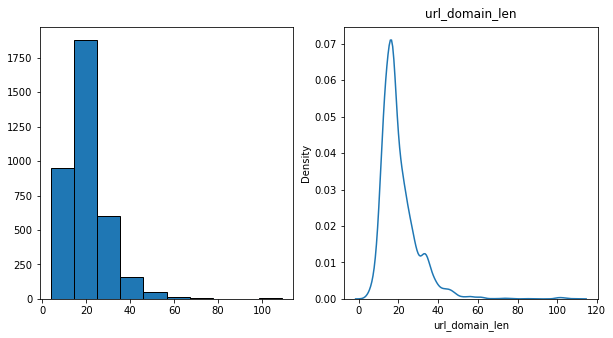

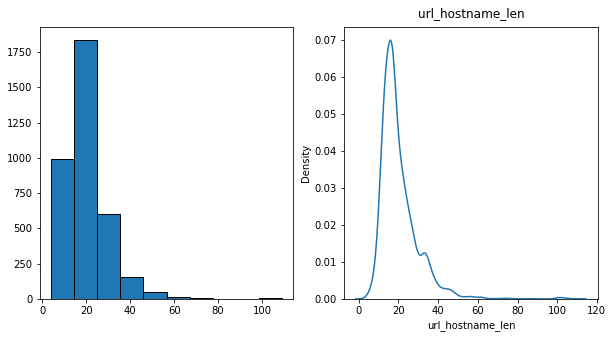

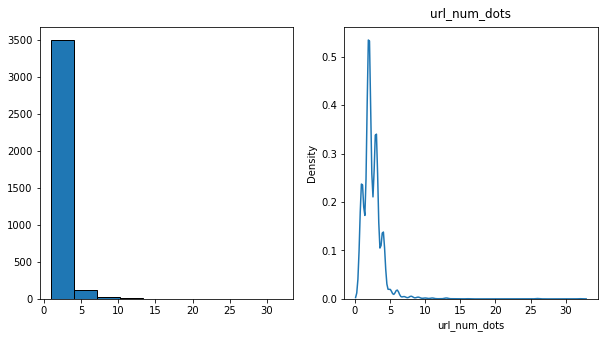

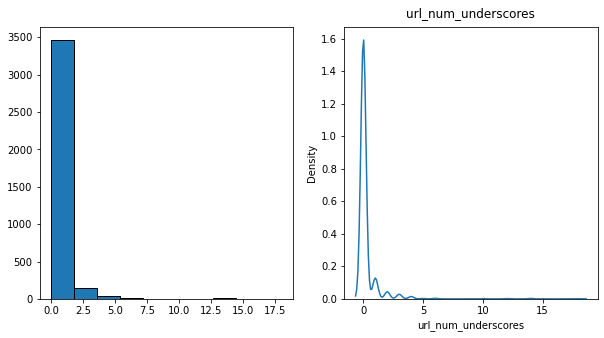

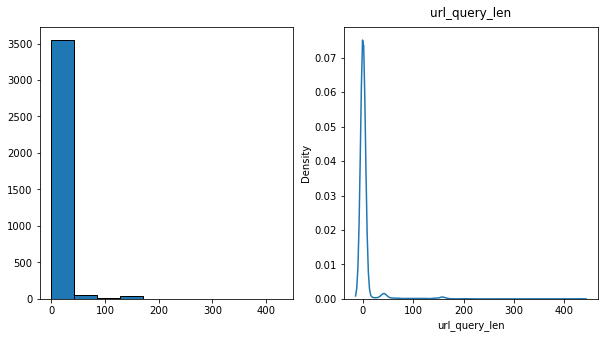

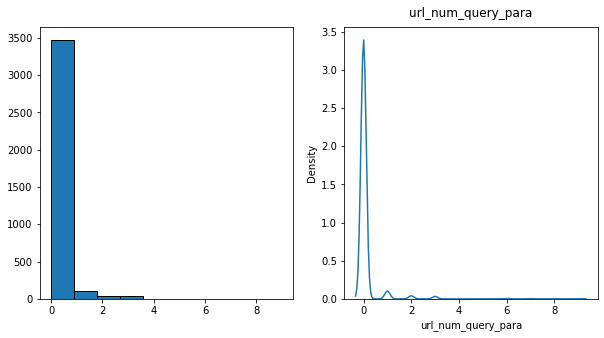

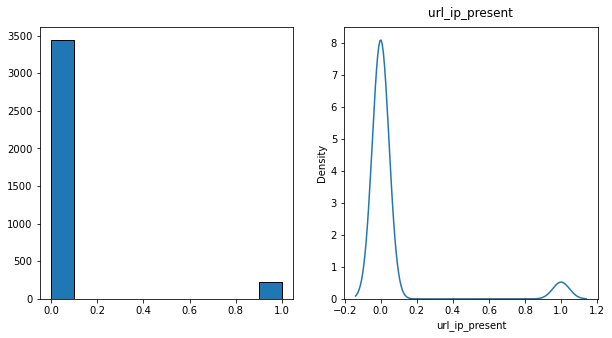

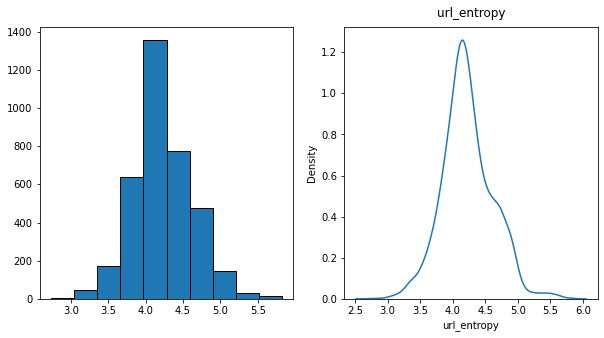

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


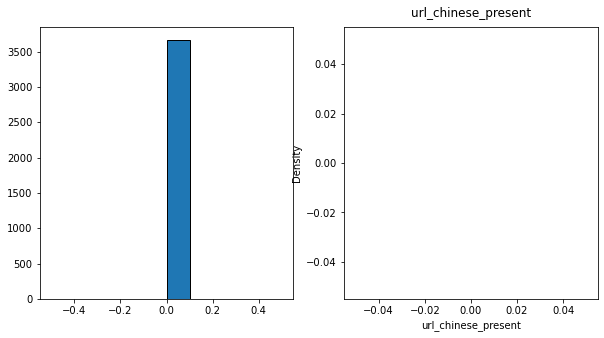

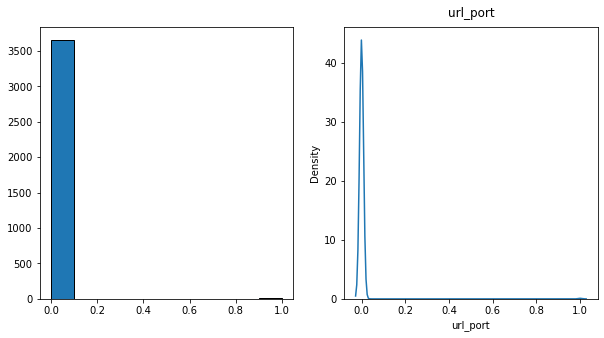

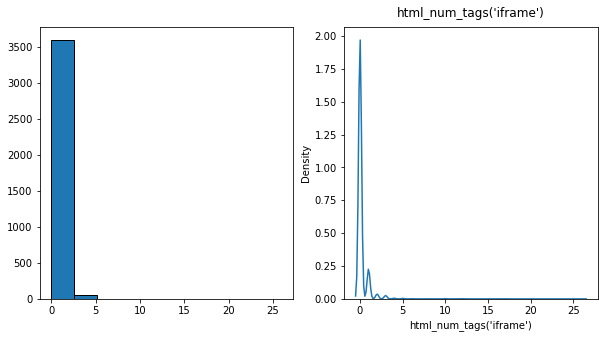

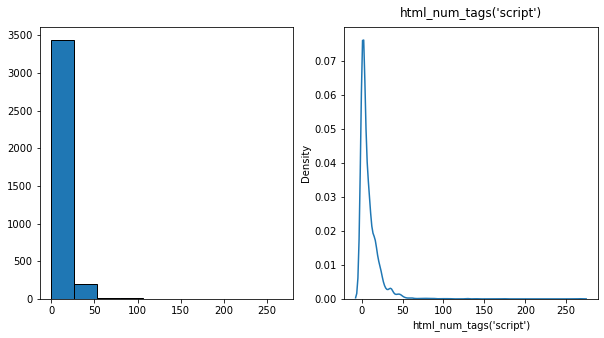

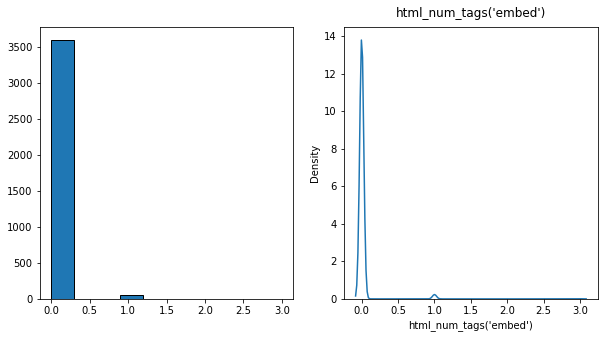

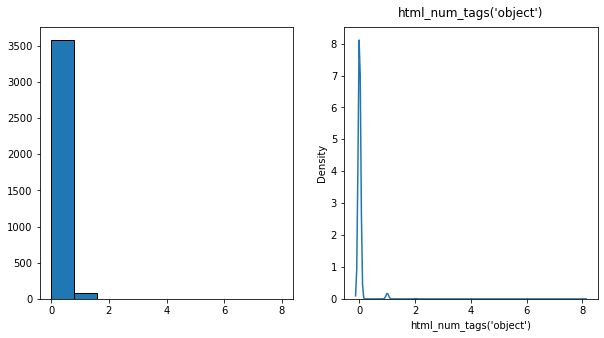

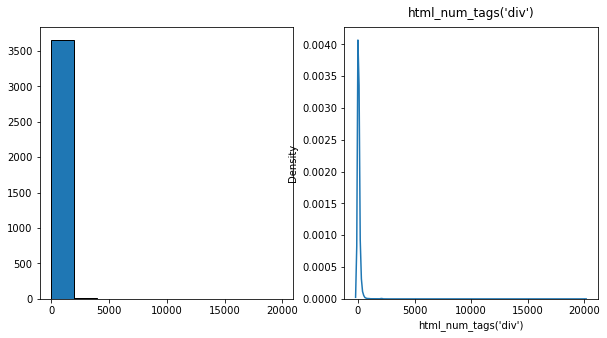

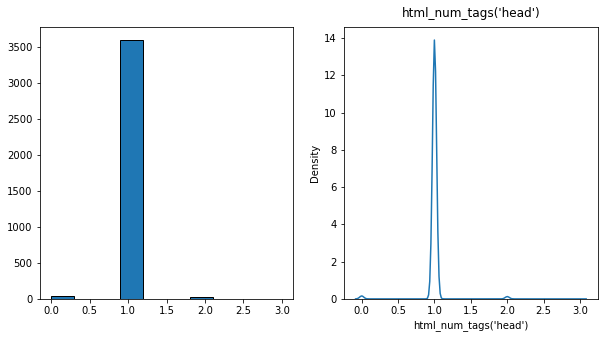

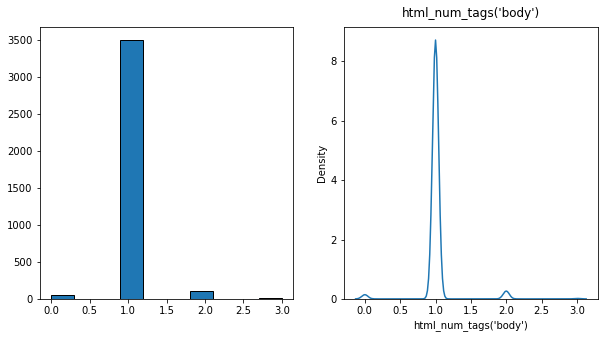

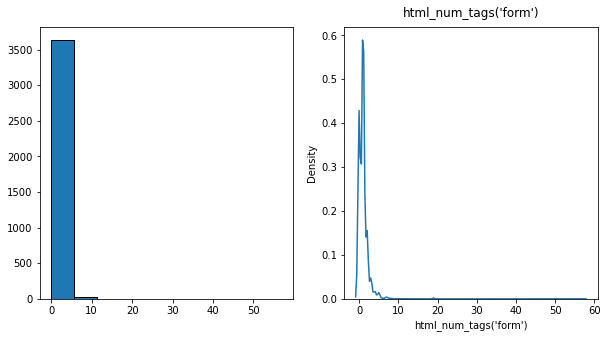

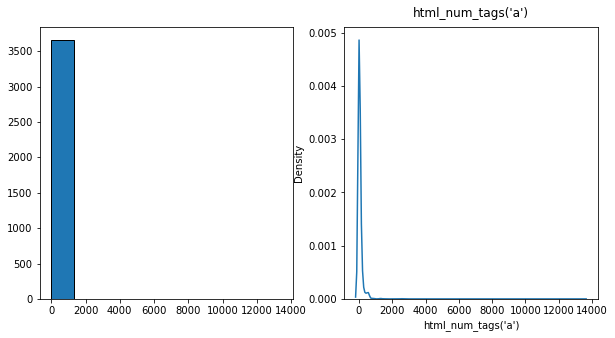

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


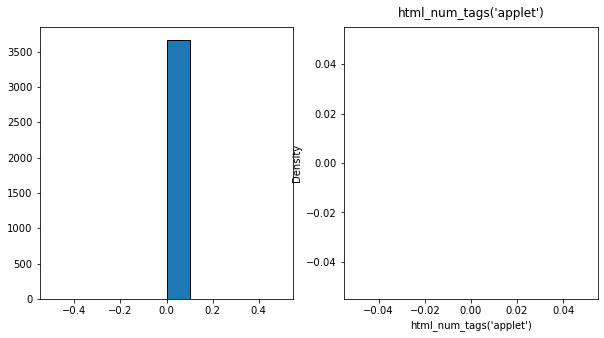

In [12]:
cols = list(df1.columns)

for col in cols:
    plt.figure(figsize = (10, 5))
    plt.title(col)
    plt.subplot(1,2,1)
    plt.hist(data = df1, x = col, edgecolor ='black')
    
    plt.subplot(1,2,2)
    plt.title(col, pad = 10)
    sns.kdeplot(data = df1, x = col)
    plt.show()

In [13]:
#df.corr에 타켓과의 관계를 보고싶은데 타켓이 범주형이라 corr에 나오지가 않음. 먼저 범주형으로 변경

df2['Result_v1'] = df2['Result_v1'].map({'malicious': 0, 'benign': 1})
df2

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),Result_v1
0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0
1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,0.0,...,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,0.0,1
2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,...,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,0.0,1
3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,0.0,...,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,0.0,1
4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3659,68.0,3.0,16.0,52.0,52.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,1.0,1.0,0.0,3.0,0.0,0
3660,66.0,0.0,48.0,18.0,18.0,2.0,0.0,0.0,0.0,0.0,...,14.0,0.0,0.0,212.0,1.0,1.0,3.0,475.0,0.0,1
3661,90.0,1.0,64.0,26.0,26.0,4.0,0.0,0.0,0.0,0.0,...,13.0,0.0,0.0,75.0,1.0,1.0,2.0,103.0,0.0,0
3662,46.0,0.0,33.0,13.0,13.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,1.0,1.0,0.0,3.0,0.0,1


In [14]:
# 정확한 관계 파악을 위해서 결측치를 제거한다
df2.dropna(axis = 0,inplace = True)
df2.isna().sum()

url_len                    0
url_num_hyphens_dom        0
url_path_len               0
url_domain_len             0
url_hostname_len           0
url_num_dots               0
url_num_underscores        0
url_query_len              0
url_num_query_para         0
url_ip_present             0
url_entropy                0
url_chinese_present        0
url_port                   0
html_num_tags('iframe')    0
html_num_tags('script')    0
html_num_tags('embed')     0
html_num_tags('object')    0
html_num_tags('div')       0
html_num_tags('head')      0
html_num_tags('body')      0
html_num_tags('form')      0
html_num_tags('a')         0
html_num_tags('applet')    0
Result_v1                  0
dtype: int64

In [15]:
df2.corr()

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),Result_v1
url_len,1.000000,-0.022906,0.943060,0.003720,0.004154,0.265969,0.313584,0.325898,0.275220,-0.064344,...,-0.031197,-0.010599,-0.021034,-0.015682,0.070790,0.045517,-0.036450,-0.022294,NaN,-0.007357
url_num_hyphens_dom,-0.022906,1.000000,-0.097759,0.594840,0.595850,-0.086752,-0.060560,0.002239,-0.002032,-0.123792,...,-0.100829,-0.051734,-0.048484,-0.010954,0.050909,-0.037450,0.047483,-0.037264,NaN,-0.354666
url_path_len,0.943060,-0.097759,1.000000,-0.124312,-0.124075,0.200456,0.263007,0.015370,0.014265,-0.033677,...,0.002893,-0.002151,-0.014874,-0.010298,0.072815,-0.004283,-0.040979,-0.010509,NaN,0.100681
url_domain_len,0.003720,0.594840,-0.124312,1.000000,0.998949,0.073277,-0.089883,0.016313,0.016493,-0.149946,...,-0.104238,-0.011084,-0.028947,-0.002318,0.011323,0.030874,0.028952,-0.037186,NaN,-0.379331
url_hostname_len,0.004154,0.595850,-0.124075,0.998949,1.000000,0.069593,-0.091174,0.017373,0.017526,-0.168319,...,-0.101480,-0.010310,-0.030284,-0.001312,0.011211,0.031223,0.031806,-0.035993,NaN,-0.383235
url_num_dots,0.265969,-0.086752,0.200456,0.073277,0.069593,1.000000,0.252406,0.213563,0.182729,0.185958,...,-0.084627,-0.030849,-0.017047,-0.031807,-0.026251,-0.000408,-0.069857,-0.030861,NaN,0.045959
url_num_underscores,0.313584,-0.060560,0.263007,-0.089883,-0.091174,0.252406,1.000000,0.238256,0.237892,-0.048390,...,-0.058170,-0.028507,-0.021364,-0.018435,0.060131,0.029475,-0.074659,-0.004402,NaN,0.128536
url_query_len,0.325898,0.002239,0.015370,0.016313,0.017373,0.213563,0.238256,1.000000,0.838149,-0.047256,...,-0.069995,-0.023149,-0.010992,-0.017870,0.000147,0.149048,-0.002471,-0.025316,NaN,-0.188576
url_num_query_para,0.275220,-0.002032,0.014265,0.016493,0.017526,0.182729,0.237892,0.838149,1.000000,-0.046136,...,-0.068097,-0.022600,-0.016115,-0.016296,-0.017279,0.108933,-0.007009,-0.025142,NaN,-0.184108
url_ip_present,-0.064344,-0.123792,-0.033677,-0.149946,-0.168319,0.185958,-0.048390,-0.047256,-0.046136,1.000000,...,-0.083482,-0.031613,0.050901,-0.033256,0.011241,-0.018777,-0.082260,-0.038047,NaN,0.078929


<AxesSubplot:>

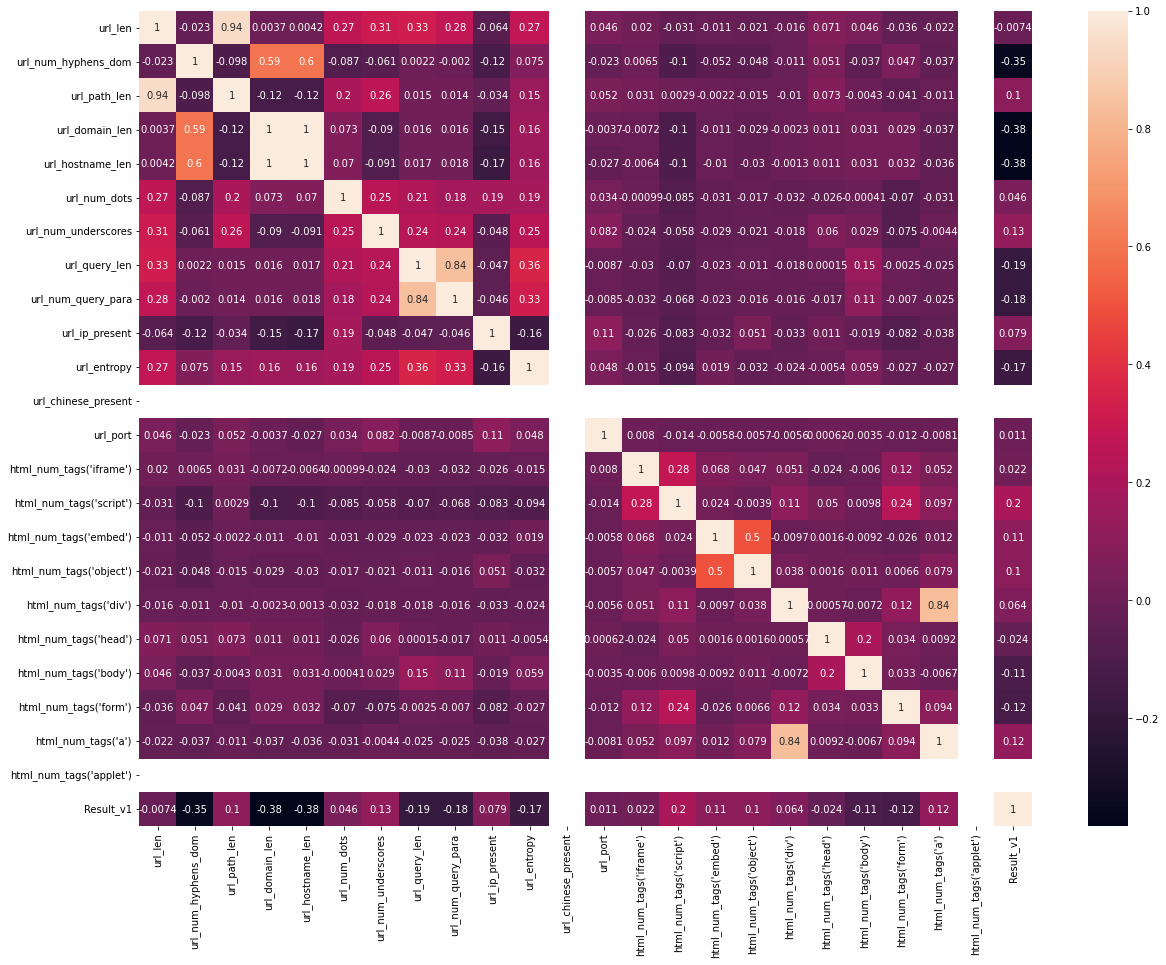

In [16]:
plt.figure(figsize = (20, 15))
sns.heatmap(df2.corr(), annot = True)

#### 위 정보로부터 파악한 내용 정리


1. target은 Result_v1 이다

2. 결측치를 2개 정도 보인다

3. target을 제외하고는 모두 숫자형이다

4. url_chinese_present , html_num_tags('applet') 은 값이 없다// 배우기로는 모든 셀에는 값이 있어야 한다라고 배웠는데 두 열은 값이 없다 <-- 나중에 뺄 값으로 생각하면 될 것 같다

## <b>Q2. 데이터 이변량 분석하기

* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 적절한 유의수준
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.

In [17]:
import statsmodels.api as sm
import scipy.stats as spst

### 2가지 가설

- 악성 사이트는 ip주소랑 관련이 있을까?

In [18]:
target = 'Result_v1'

feature = 'url_ip_present'

table = pd.crosstab(df[target], df[feature])
result = spst.chi2_contingency(table)

print('p-value:', result[1])


p-value: 1.9645029354744843e-06


url domain 길이는 악성 사이트와 관련이 있는가?

In [19]:
feature = 'url_domain_len'

df_get = pd.get_dummies(df, columns = [target], drop_first= True)
df_get.dropna(axis = 0, inplace = True)
model = sm.Logit(df_get['Result_v1_malicious'], df_get[feature])
result = model.fit()

print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.269483
         Iterations 4
url_domain_len    3.815200e-19
dtype: float64


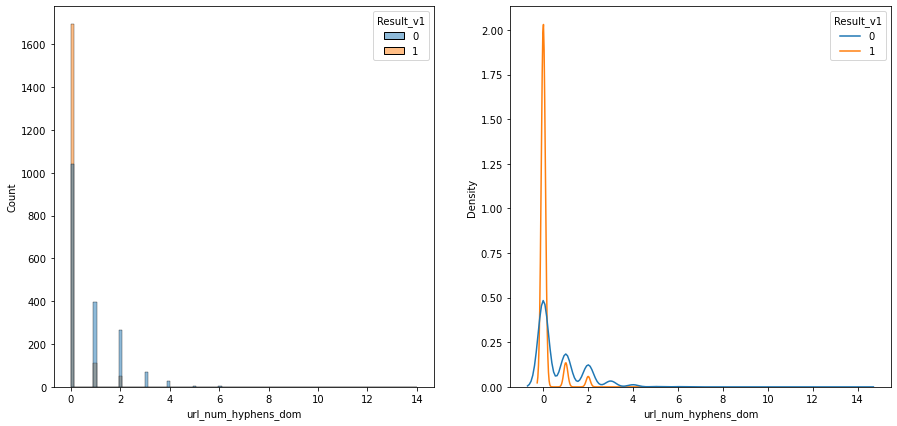

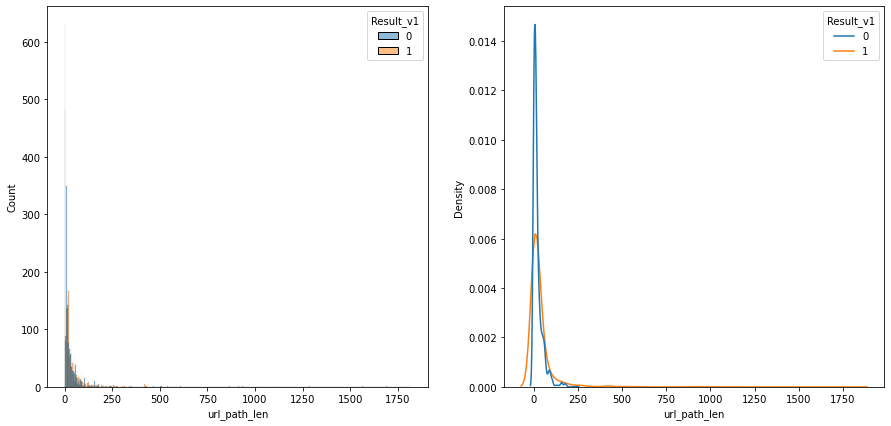

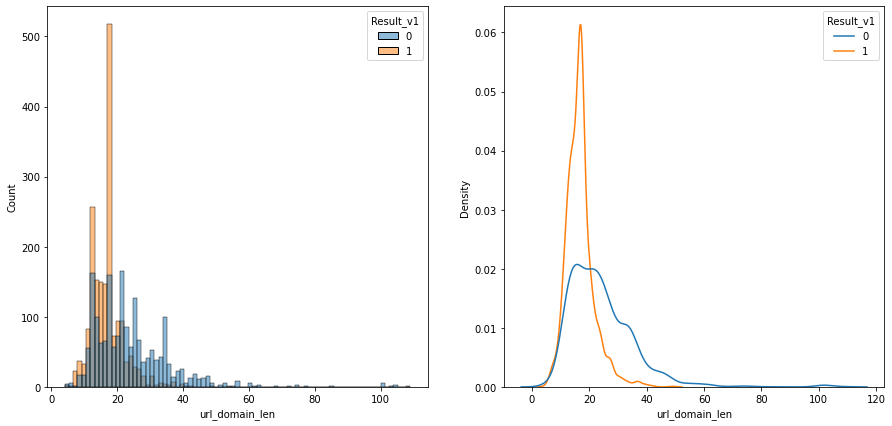

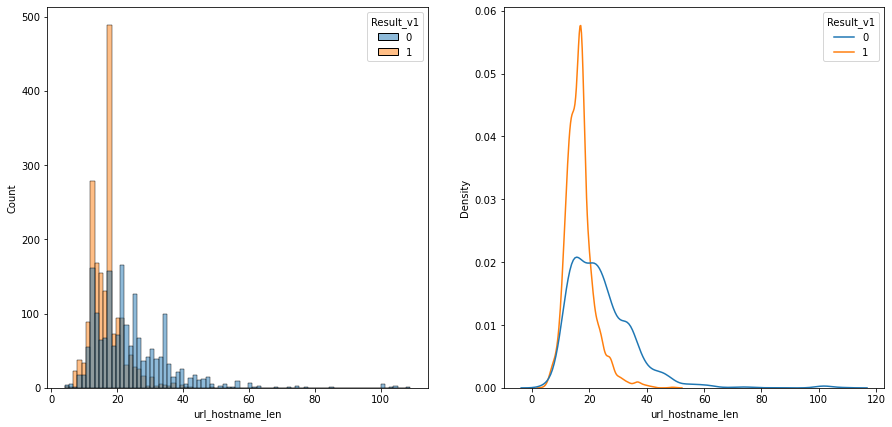

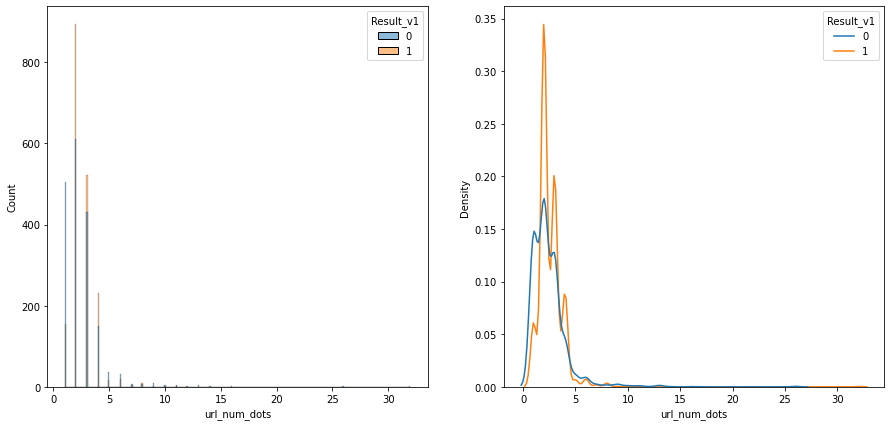

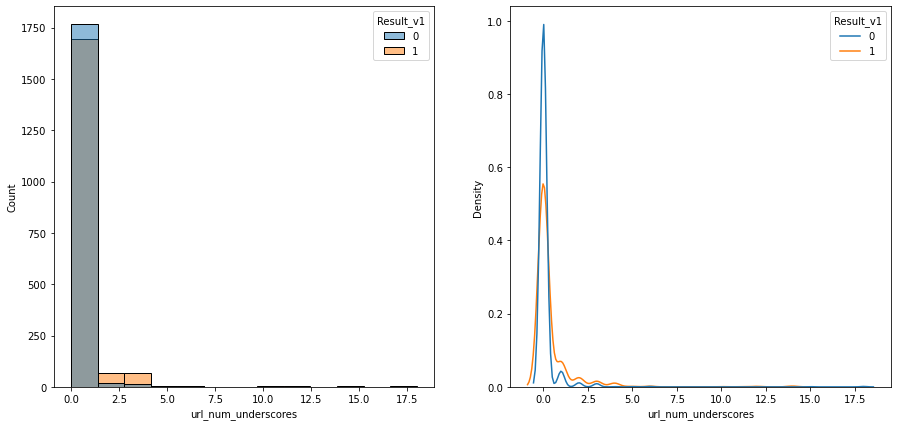

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


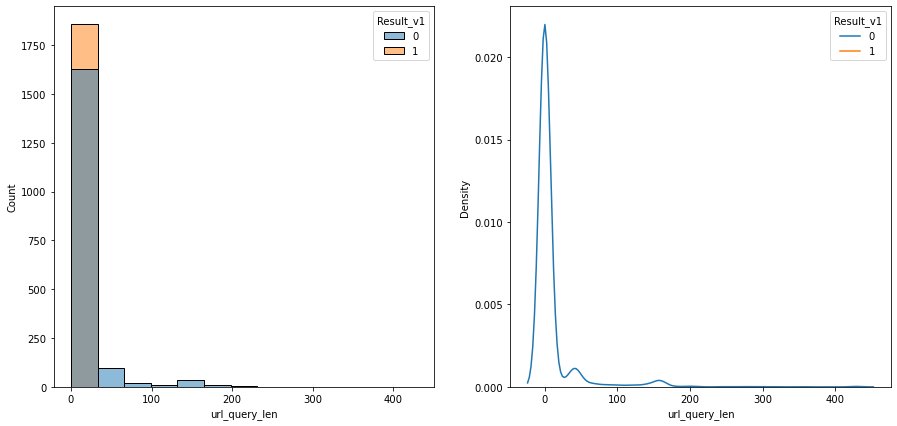

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


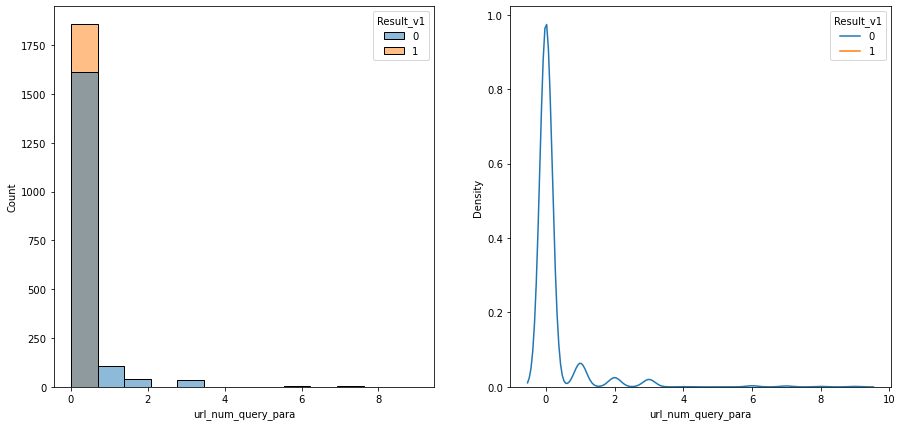

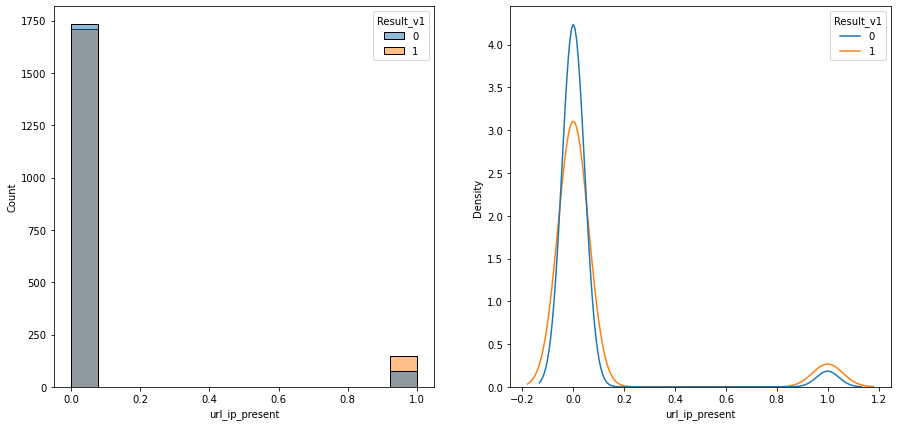

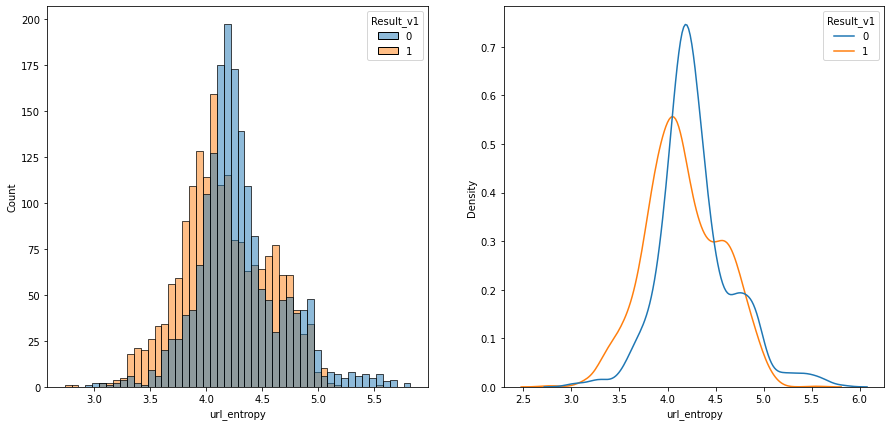

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


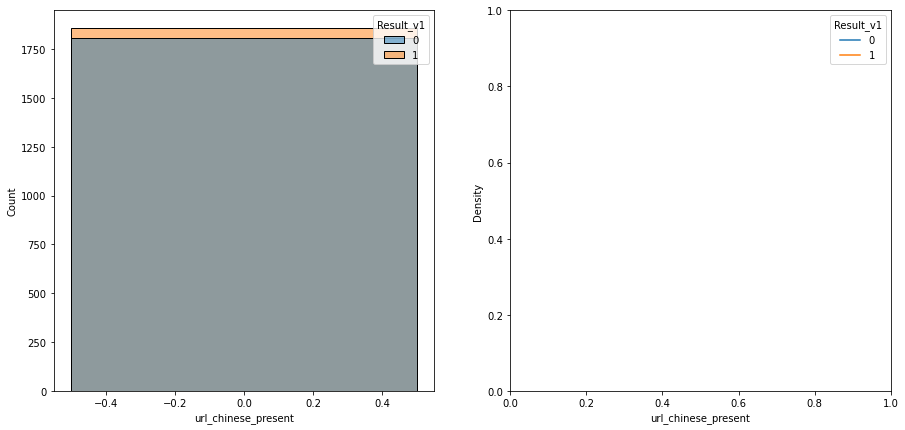

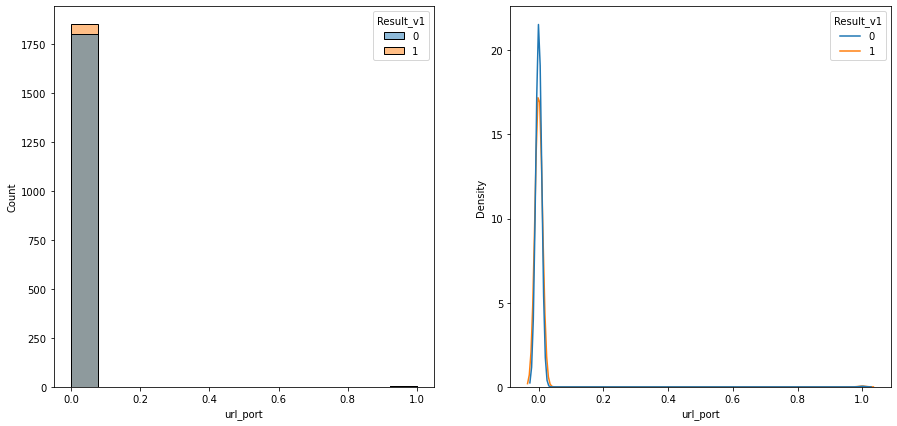

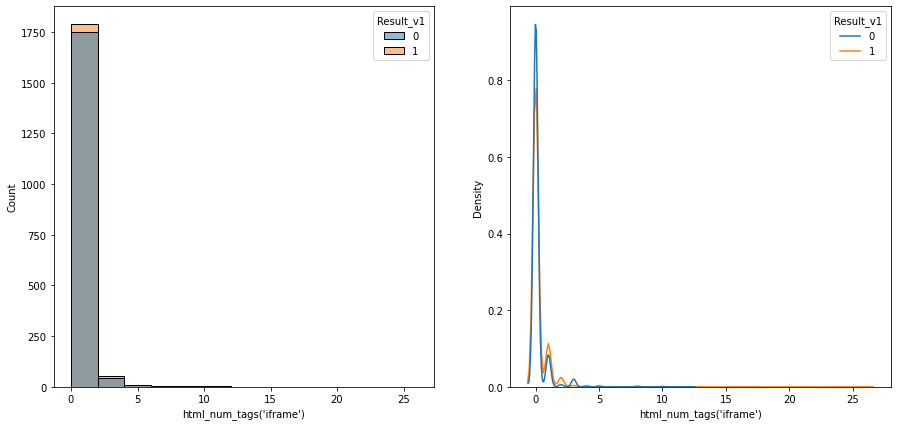

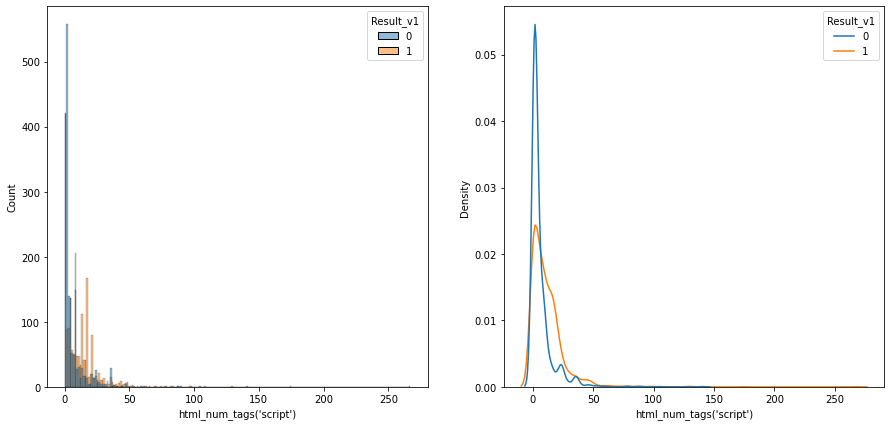

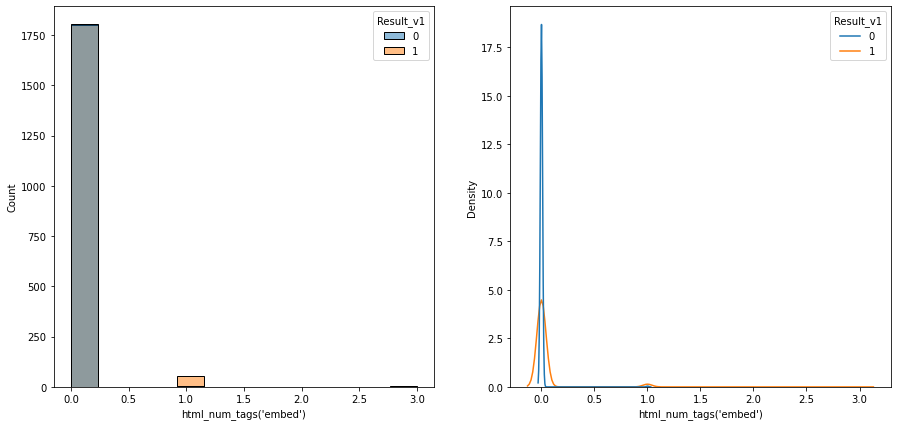

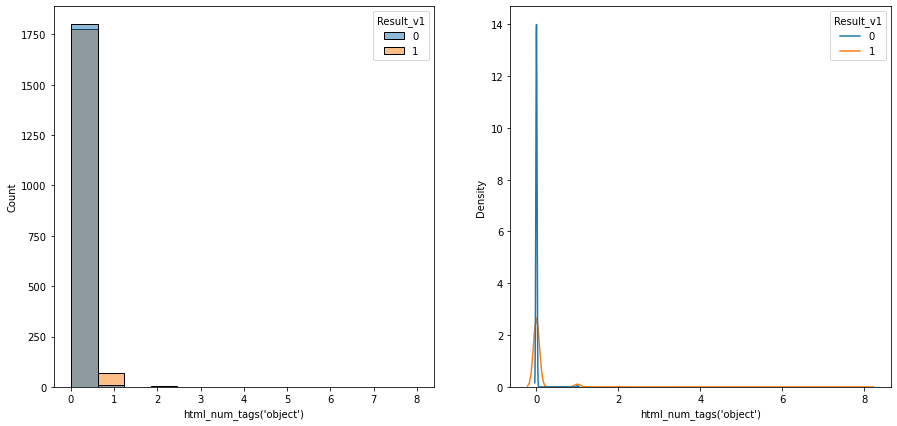

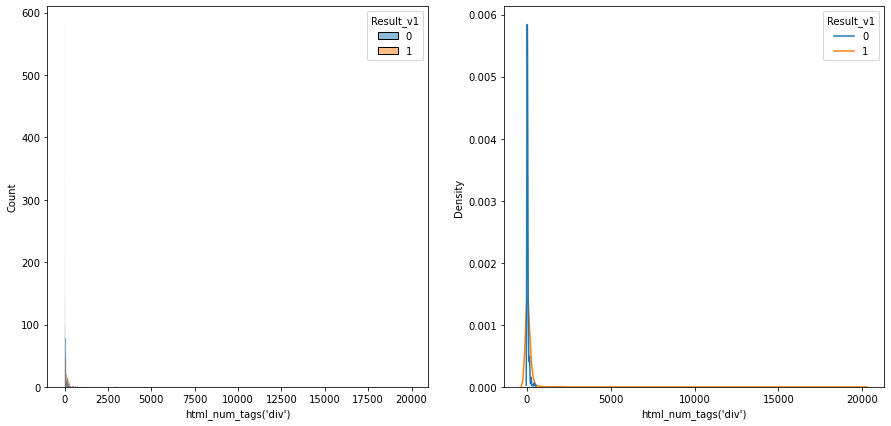

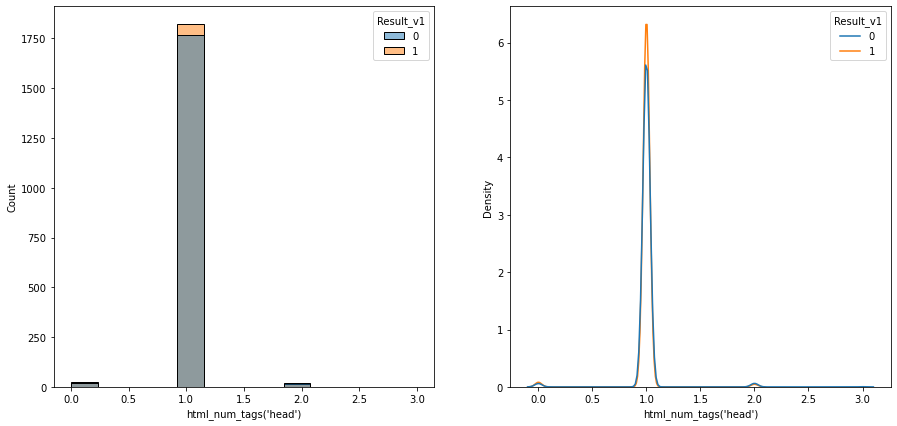

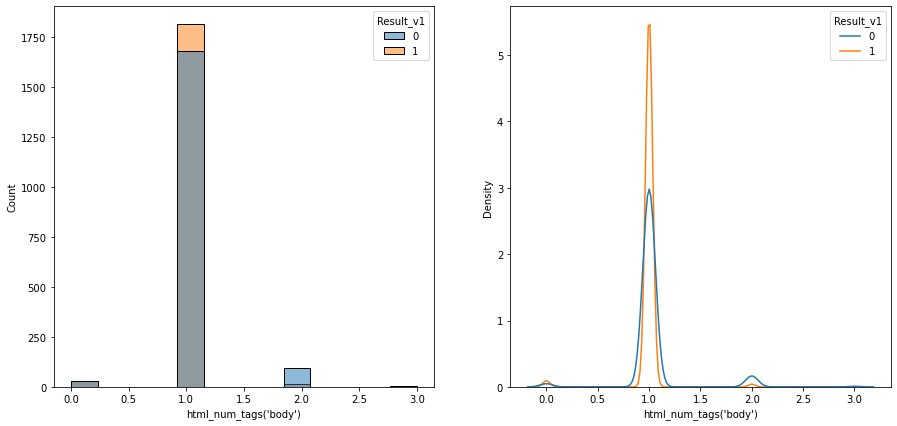

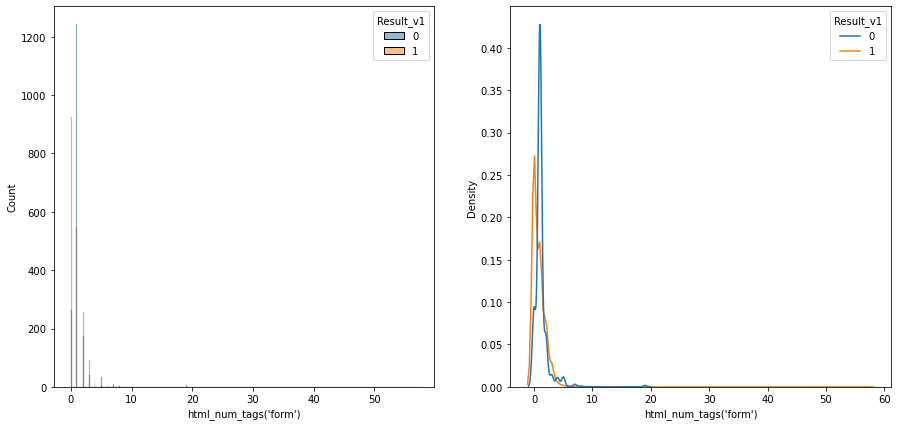

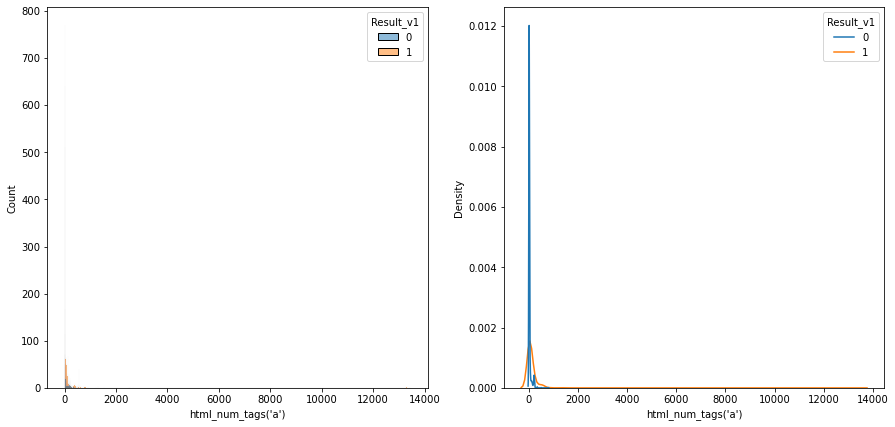

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


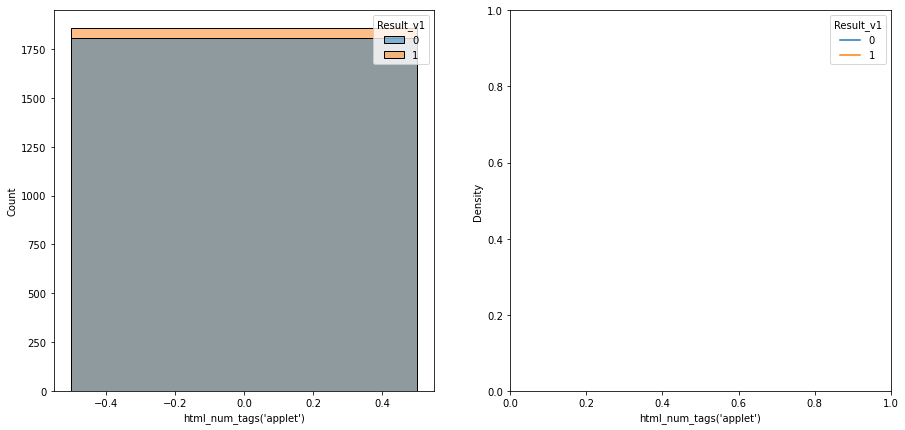

In [20]:
target = 'Result_v1'

cols = list(df1.columns)

for col in cols:
    plt.figure(figsize = (15,7))
    plt.subplot(1,2,1)
    sns.histplot(data = df2 , x = col, hue = target )
    
    plt.subplot(1,2,2)
    sns.kdeplot(data = df2, x = col, hue = target)
    plt.show()

# <b>Step 2. 데이터 전처리
---

## <b>Q3. 중복 데이터 제거
### 우리가 접속하는 대부분의 웹사이트는 정상 사이트입니다.
### 또한, 특정 몇 개 사이트(ex. google, instagram, facebook 등)에 접속 빈도가 높습니다.
### 편중된 데이터는 모델 학습에 안 좋은 영향을 주기 때문에 중복 데이터 제거를 통해 해결합니다.
### 이 과정은 데이터 전처리 시 반드시 해야 하는 과정은 아니며, 프로젝트/데이터 성격에 맞게 결정하시면 됩니다.

### <span style="color:darkred">[문제1] df info()를 통해 데이터를 확인하고 중복된 데이터는 삭제해주세요. 삭제 후 info()를 통해 이전 데이터와 비교해 보세요.<span>

In [21]:
# 데이터 프레임의 info를 확인합니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3664 entries, 0 to 3663
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url_len                  3664 non-null   float64
 1   url_num_hyphens_dom      3664 non-null   float64
 2   url_path_len             3663 non-null   float64
 3   url_domain_len           3663 non-null   float64
 4   url_hostname_len         3664 non-null   float64
 5   url_num_dots             3664 non-null   float64
 6   url_num_underscores      3664 non-null   float64
 7   url_query_len            3664 non-null   float64
 8   url_num_query_para       3664 non-null   float64
 9   url_ip_present           3664 non-null   float64
 10  url_entropy              3664 non-null   float64
 11  url_chinese_present      3664 non-null   float64
 12  url_port                 3664 non-null   float64
 13  html_num_tags('iframe')  3664 non-null   float64
 14  html_num_tags('script') 

- 위 그래프를 보았을 때 'url_domain_len','url_hostname_len' 2개가 중복 데이터인 것 같습니다.

In [22]:
# 중복 데이터 제거를 제거합니다.
del_c = ['url_domain_len']

df = df.drop(columns = del_c , axis = 1)
df

,url_len,url_num_hyphens_dom,url_path_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,url_entropy,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),Result_v1
0,23.0,0.0,8.0,15.0,2.0,0.0,0.0,0.0,0.0,4.260333,...,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,malicious
1,75.0,0.0,58.0,17.0,6.0,0.0,0.0,0.0,0.0,4.636107,...,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,0.0,benign
2,20.0,0.0,4.0,16.0,2.0,0.0,0.0,0.0,0.0,3.708966,...,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,0.0,benign
3,27.0,0.0,13.0,14.0,3.0,0.0,0.0,0.0,0.0,4.025592,...,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,0.0,benign
4,39.0,2.0,12.0,27.0,2.0,0.0,0.0,0.0,0.0,4.631833,...,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,0.0,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3659,68.0,3.0,16.0,52.0,2.0,0.0,0.0,0.0,0.0,4.135356,...,0.0,0.0,0.0,11.0,1.0,1.0,0.0,3.0,0.0,malicious
3660,66.0,0.0,48.0,18.0,2.0,0.0,0.0,0.0,0.0,4.362331,...,14.0,0.0,0.0,212.0,1.0,1.0,3.0,475.0,0.0,benign
3661,90.0,1.0,64.0,26.0,4.0,0.0,0.0,0.0,0.0,4.693343,...,13.0,0.0,0.0,75.0,1.0,1.0,2.0,103.0,0.0,malicious
3662,46.0,0.0,33.0,13.0,3.0,0.0,0.0,0.0,0.0,4.604166,...,0.0,0.0,0.0,4.0,1.0,1.0,0.0,3.0,0.0,benign


In [23]:
# 데이터 프레임의 info를 확인합니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3664 entries, 0 to 3663
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url_len                  3664 non-null   float64
 1   url_num_hyphens_dom      3664 non-null   float64
 2   url_path_len             3663 non-null   float64
 3   url_hostname_len         3664 non-null   float64
 4   url_num_dots             3664 non-null   float64
 5   url_num_underscores      3664 non-null   float64
 6   url_query_len            3664 non-null   float64
 7   url_num_query_para       3664 non-null   float64
 8   url_ip_present           3664 non-null   float64
 9   url_entropy              3664 non-null   float64
 10  url_chinese_present      3664 non-null   float64
 11  url_port                 3664 non-null   float64
 12  html_num_tags('iframe')  3664 non-null   float64
 13  html_num_tags('script')  3664 non-null   float64
 14  html_num_tags('embed')  

---

## <b>Q4. 텍스트와 범주형 특성 처리

### 기계가 데이터를 인식할 수 있도록 텍스트 데이터를 수치형 데이터로 변경합니다.
 - replace() 함수를 이용한 텍스트와 범주형 특성 처리

**<span style="color:green">[참고링크] 공식 Document**</span>

* replace(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html)
* unique(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.unique.html)

### <span style="color:blue">[예시] df_ex 데이터 프레임에서 replace 함수를 활용 'CA'는'California'로 'NY'는 'NewYork'으로 변경합니다.<span>

In [24]:
import pandas as pd

df_ex = pd.DataFrame({'name': ['Alice','Bob','Charlie','Dave','Ellen','Frank'],
                   'age': [24,42,18,68,24,30],
                   'state': ['NY','CA','CA','TX','CA','NY'],
                   'point': [64,24,70,70,88,57]}
                  )

print(df_ex)

      name  age state  point
0    Alice   24    NY     64
1      Bob   42    CA     24
2  Charlie   18    CA     70
3     Dave   68    TX     70
4    Ellen   24    CA     88
5    Frank   30    NY     57


In [25]:
df_ex.replace('CA', 'California', inplace = True)
df_ex.replace('NY', 'NewYork', inplace = True)

In [26]:
df_ex

,name,age,state,point
0,Alice,24,NewYork,64
1,Bob,42,California,24
2,Charlie,18,California,70
3,Dave,68,TX,70
4,Ellen,24,California,88
5,Frank,30,NewYork,57


### <span style="color:darkred">[문제2] replace() 함수를 활용 'benign'은 1로 'malicious'은 -1로 변경해주세요. 삭제 후 df['Result_v1'] 전후 데이터를 비교해 보세요.<span>

In [27]:
# 텍스트 데이터를 수치형 데이터로 변경 전 unique() 함수를 통해 유일한 값 확인
df[target].unique()


array(['malicious', 'benign'], dtype=object)

In [28]:
# replace() 함수를 사용 텍스트 데이터를 수치형 데이터로 변경합니다.
df.replace('malicious', -1, inplace = True)
df.replace('benign' , 1, inplace = True)
df

,url_len,url_num_hyphens_dom,url_path_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,url_entropy,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),Result_v1
0,23.0,0.0,8.0,15.0,2.0,0.0,0.0,0.0,0.0,4.260333,...,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,-1
1,75.0,0.0,58.0,17.0,6.0,0.0,0.0,0.0,0.0,4.636107,...,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,0.0,1
2,20.0,0.0,4.0,16.0,2.0,0.0,0.0,0.0,0.0,3.708966,...,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,0.0,1
3,27.0,0.0,13.0,14.0,3.0,0.0,0.0,0.0,0.0,4.025592,...,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,0.0,1
4,39.0,2.0,12.0,27.0,2.0,0.0,0.0,0.0,0.0,4.631833,...,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3659,68.0,3.0,16.0,52.0,2.0,0.0,0.0,0.0,0.0,4.135356,...,0.0,0.0,0.0,11.0,1.0,1.0,0.0,3.0,0.0,-1
3660,66.0,0.0,48.0,18.0,2.0,0.0,0.0,0.0,0.0,4.362331,...,14.0,0.0,0.0,212.0,1.0,1.0,3.0,475.0,0.0,1
3661,90.0,1.0,64.0,26.0,4.0,0.0,0.0,0.0,0.0,4.693343,...,13.0,0.0,0.0,75.0,1.0,1.0,2.0,103.0,0.0,-1
3662,46.0,0.0,33.0,13.0,3.0,0.0,0.0,0.0,0.0,4.604166,...,0.0,0.0,0.0,4.0,1.0,1.0,0.0,3.0,0.0,1


In [29]:
# 텍스트 데이터를 수치형 데이터로 후 unique() 함수를 통해 유일한 값 확인
df[target].unique()



array([-1,  1], dtype=int64)

---

## <b>Q5. 결측치 처리

### 데이터 수집 과정에서 발생한 오류 등으로 인해 결측치가 포함된 경우가 많습니다.
### 모델링 전에 결측치를 확인하고 이를 정제하는 과정은 필요합니다.

### <span style="color:darkred">[문제3] 결측치의 존재를 확인하고 결측치가 포함된 데이터를 처리해보세요.<span>

In [30]:
# 결축치의 존재를 확인합니다.
df.isna().sum()


url_len                    0
url_num_hyphens_dom        0
url_path_len               1
url_hostname_len           0
url_num_dots               0
url_num_underscores        0
url_query_len              0
url_num_query_para         0
url_ip_present             0
url_entropy                0
url_chinese_present        0
url_port                   0
html_num_tags('iframe')    0
html_num_tags('script')    0
html_num_tags('embed')     0
html_num_tags('object')    0
html_num_tags('div')       0
html_num_tags('head')      0
html_num_tags('body')      0
html_num_tags('form')      0
html_num_tags('a')         0
html_num_tags('applet')    0
Result_v1                  0
dtype: int64

In [32]:
# 결측치를 적절히 처리해줍니다.
df = df.dropna(axis = 0)
df.isna().sum()


url_len                    0
url_num_hyphens_dom        0
url_hostname_len           0
url_num_dots               0
url_num_underscores        0
url_query_len              0
url_num_query_para         0
url_ip_present             0
url_entropy                0
url_chinese_present        0
url_port                   0
html_num_tags('iframe')    0
html_num_tags('script')    0
html_num_tags('embed')     0
html_num_tags('object')    0
html_num_tags('div')       0
html_num_tags('head')      0
html_num_tags('body')      0
html_num_tags('form')      0
html_num_tags('a')         0
html_num_tags('applet')    0
Result_v1                  0
dtype: int64

In [31]:
# 결축치의 존재를 확인합니다.
df.isna().sum()


url_len                    0
url_num_hyphens_dom        0
url_path_len               1
url_hostname_len           0
url_num_dots               0
url_num_underscores        0
url_query_len              0
url_num_query_para         0
url_ip_present             0
url_entropy                0
url_chinese_present        0
url_port                   0
html_num_tags('iframe')    0
html_num_tags('script')    0
html_num_tags('embed')     0
html_num_tags('object')    0
html_num_tags('div')       0
html_num_tags('head')      0
html_num_tags('body')      0
html_num_tags('form')      0
html_num_tags('a')         0
html_num_tags('applet')    0
Result_v1                  0
dtype: int64

---

## <b>Q6. 데이터 탐색을 통해 새로운 변수 추가 혹은 불필요한 변수 제거

### AI모델의 성능 향상을 위해 기존의 변수를 조합해 새로운 변수를 만들어 내기도 하고
### 데이터 분석을 통해 필요없는 변수는 삭제하는 과정이 필요 합니다.

### <span style="color:darkred">[문제4] 상관관계 함수 및 데이터 시각화 등을 활용하며 데이터셋을 분석하고 컬럼을 추가/삭제 해보세요.<span>

In [32]:
del_c = ['url_chinese_present',"html_num_tags('applet')"]

df.drop(columns = del_c , axis = 1, inplace =True)

df.head()

,url_len,url_num_hyphens_dom,url_path_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,url_entropy,...,html_num_tags('iframe'),html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),Result_v1
0,23.0,0.0,8.0,15.0,2.0,0.0,0.0,0.0,0.0,4.260333,...,0.0,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-1
1,75.0,0.0,58.0,17.0,6.0,0.0,0.0,0.0,0.0,4.636107,...,0.0,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,1
2,20.0,0.0,4.0,16.0,2.0,0.0,0.0,0.0,0.0,3.708966,...,1.0,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,1
3,27.0,0.0,13.0,14.0,3.0,0.0,0.0,0.0,0.0,4.025592,...,0.0,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,1
4,39.0,2.0,12.0,27.0,2.0,0.0,0.0,0.0,0.0,4.631833,...,0.0,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,1


In [39]:
col_list = list(df.columns)
col_list.remove('Result_v1')


to_logistic_data = df.dropna()

to_logistic_data['Result_v1'] = to_logistic_data['Result_v1'].apply(lambda x : 1 if x == -1 else 0)

def logistic(columns):
    model = sm.Logit(to_logistic_data['Result_v1'], to_logistic_data[columns])
    result = model.fit()
    return result.pvalues


for i in col_list:
    print(i)
    print(logistic)
    print()

url_len
<function logistic at 0x000001C91E3815E0>

url_num_hyphens_dom
<function logistic at 0x000001C91E3815E0>

url_path_len
<function logistic at 0x000001C91E3815E0>

url_hostname_len
<function logistic at 0x000001C91E3815E0>

url_num_dots
<function logistic at 0x000001C91E3815E0>

url_num_underscores
<function logistic at 0x000001C91E3815E0>

url_query_len
<function logistic at 0x000001C91E3815E0>

url_num_query_para
<function logistic at 0x000001C91E3815E0>

url_ip_present
<function logistic at 0x000001C91E3815E0>

url_entropy
<function logistic at 0x000001C91E3815E0>

url_port
<function logistic at 0x000001C91E3815E0>

html_num_tags('iframe')
<function logistic at 0x000001C91E3815E0>

html_num_tags('script')
<function logistic at 0x000001C91E3815E0>

html_num_tags('embed')
<function logistic at 0x000001C91E3815E0>

html_num_tags('object')
<function logistic at 0x000001C91E3815E0>

html_num_tags('div')
<function logistic at 0x000001C91E3815E0>

html_num_tags('head')
<function logi

<ipython-input-39-893832572706>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_logistic_data['Result_v1'] = to_logistic_data['Result_v1'].apply(lambda x : 1 if x == -1 else 0)


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3664 entries, 0 to 3663
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url_len                  3664 non-null   float64
 1   url_num_hyphens_dom      3664 non-null   float64
 2   url_hostname_len         3664 non-null   float64
 3   url_num_dots             3664 non-null   float64
 4   url_num_underscores      3664 non-null   float64
 5   url_query_len            3664 non-null   float64
 6   url_num_query_para       3664 non-null   float64
 7   url_ip_present           3664 non-null   float64
 8   url_entropy              3664 non-null   float64
 9   url_port                 3664 non-null   float64
 10  html_num_tags('iframe')  3664 non-null   float64
 11  html_num_tags('script')  3664 non-null   float64
 12  html_num_tags('embed')   3664 non-null   float64
 13  html_num_tags('object')  3664 non-null   float64
 14  html_num_tags('div')    

---

## <b>Q7. train_test_split을 이용하여, train_x, test_x, train_y, test_y로 데이터 분리

### 모델을 학습하는 데에는 Train 데이터만 사용해야 합니다.
### 학습에 사용하지 않은 데이터를 통해 모델을 평가해야 합니다.
### 그러기 위해 Train / Test 데이터로 분리합니다.


**<span style="color:green">[참고링크] 공식 Document**</span>

* train_test_split(https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

### <span style="color:darkred">[문제5] train_test_split 함수를 사용하여 train 데이터와 test 데이터를 분리하고 각각의 shape를 확인하세요<span>

In [37]:
target = 'Result_v1'

x = df.drop(columns = target , axis = 1)
y = df[target]

print(x.shape)
print(y.shape)

(3664, 19)
(3664,)
